# Introdução à Visão Computacional

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity
%matplotlib inline

## > Introdução à Visão Computacional

### 1. Entrada dos Dados em OpenCV

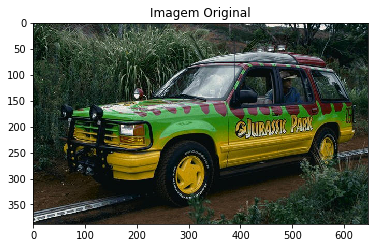

In [3]:
# Load an color image in grayscale
img = cv2.imread('jurassicpark.jpg')
# img_reshaped = cv2.resize(img, (int(img.shape[1]/10), int(img.shape[0]/10)), interpolation = cv2.INTER_AREA)

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.title('Imagem Original')
plt.show()

### 2. Transformação entre espaços de cores

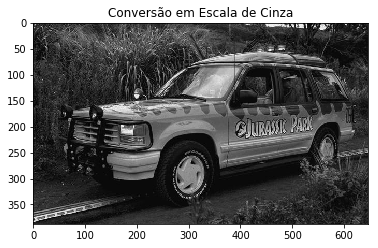

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title('Conversão em Escala de Cinza')
plt.show()

## > Filtragem

In [5]:
def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):

            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * kernel).sum()
            output[y - pad, x - pad] = k

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
 
    # return the output image
    return output

### 1. Filtros

#### i. Filtros de Suavização

In [6]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

#### ii. Filtros de Sharpen

In [7]:
# construct a sharpening filter
sharpen = np.array((
     [0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]), dtype="int")

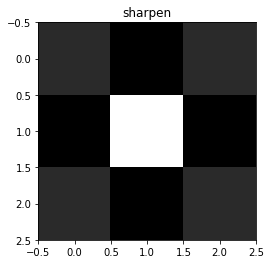

In [8]:
plt.imshow(sharpen*255, cmap='gray')
plt.title('sharpen')
plt.show()

#### iii. Filtros de Detecção de Bordas

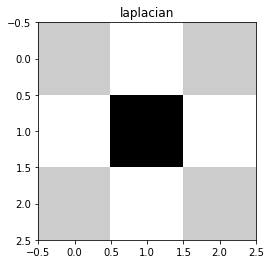

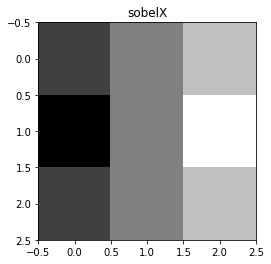

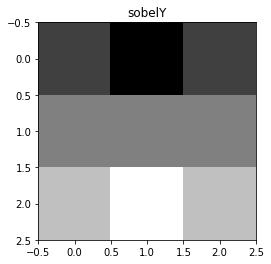

In [9]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

plt.imshow(laplacian*255, cmap='gray')
plt.title('laplacian')
plt.show()

# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

plt.imshow(sobelX*255, cmap='gray')
plt.title('sobelX')
plt.show()
 
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

plt.imshow(sobelY*255, cmap='gray')
plt.title('sobelY')
plt.show()

In [10]:
# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
    ("Filtro para pequeno desfoque (7x7)", smallBlur),
    ("Filtro para grande desfoque (21x21)", largeBlur),
    ("Filtro de sharpen", sharpen),
)

### 2. Operação de Convolução

Aplicando a operação de convolução para o kernel - Filtro para pequeno desfoque (7x7).


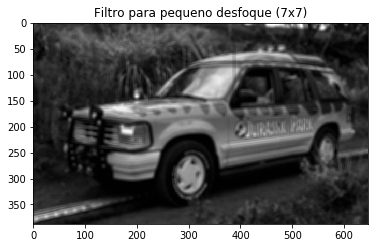

Aplicando a operação de convolução para o kernel - Filtro para grande desfoque (21x21).


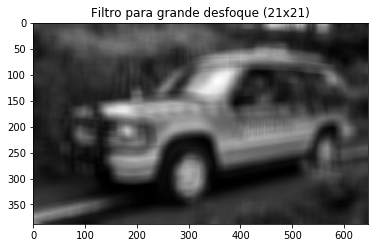

Aplicando a operação de convolução para o kernel - Filtro de sharpen.


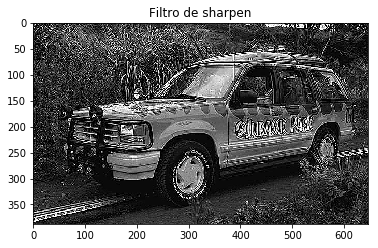

In [11]:
for (kernelName, kernel) in kernelBank:
    print("Aplicando a operação de convolução para o kernel - {}.".format(kernelName))
    convoleOutput = convolve(img_gray, kernel)
    opencvOutput = cv2.filter2D(img_gray, -1, kernel)
    plt.imshow(opencvOutput, cmap='gray')
    plt.title(kernelName)
    plt.show()

## > Features 

In [12]:
kernelBank = (
    ("Filtro detector de bordas laplaciano", laplacian),
    ("Filtro detector de bordas sobel para o eixo x", sobelX),
    ("Filtro detector de bordas sobel para o eixo y", sobelY)
)

### 1. Detecção de Bordas: 

Aplicando a operação de convolução para o kernel - Filtro detector de bordas laplaciano.


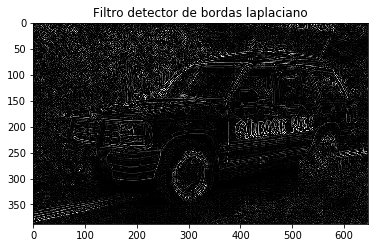

Aplicando a operação de convolução para o kernel - Filtro detector de bordas sobel para o eixo x.


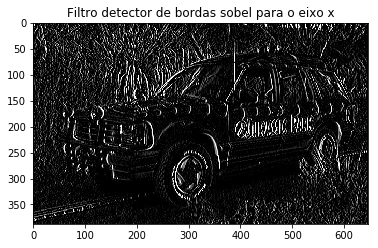

Aplicando a operação de convolução para o kernel - Filtro detector de bordas sobel para o eixo y.


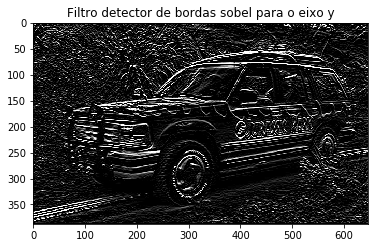

In [13]:
for (kernelName, kernel) in kernelBank:
    print("Aplicando a operação de convolução para o kernel - {}.".format(kernelName))
    convoleOutput = convolve(img_gray, kernel)
    opencvOutput = cv2.filter2D(img_gray, -1, kernel)
    plt.imshow(opencvOutput, cmap='gray')
    plt.title(kernelName)
    plt.show()

### 2. Detecção de Cantos: 

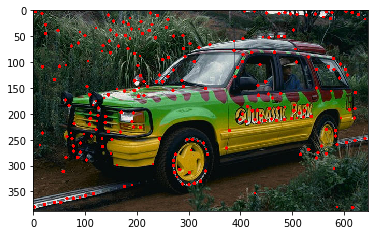

(<matplotlib.image.AxesImage at 0x23f22a04588>, None)

In [14]:
corners = cv2.goodFeaturesToTrack(img_gray,250,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img_cvt,(x,y),3,255,-1)

plt.imshow(img_cvt),plt.show()

### 3. Haar: 

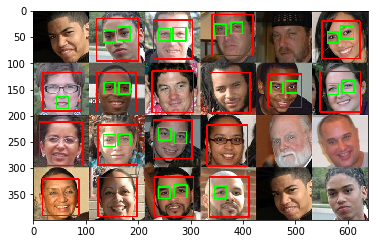

(<matplotlib.image.AxesImage at 0x23f22a4db00>, None)

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img_faces = cv2.imread('faces.jpg')
img_faces_cvt = cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB)
img_faces_gray = cv2.cvtColor(img_faces_cvt, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(img_faces_gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img_faces_cvt,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_faces_gray[y:y+h, x:x+w]
    roi_color = img_faces_cvt[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_faces_cvt),plt.show()

# Redes neurais

In [17]:
#Import required libraries 
import keras #library for neural network
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

In [18]:
data=pd.read_csv("iris.csv")
print("Info of the data:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
Info of the data: None


In [19]:
irisBank = (
    ("Iris setosa", 'iris_setosa.jpg'),
    ("Iris versicolor", 'iris_versicolor.jpg'),
    ("iris virginica", 'iris_virginica.jpg')
)

Iris setosa


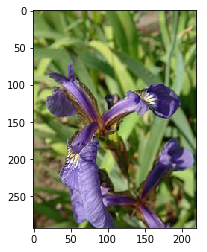

Iris versicolor


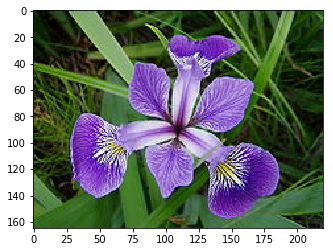

iris virginica


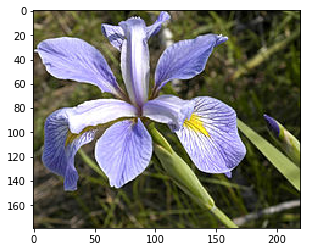

In [20]:
for (irisName, iris_filename) in irisBank:
    img_iris = cv2.imread(iris_filename)
    img_iris_cvt = cv2.cvtColor(img_iris, cv2.COLOR_BGR2RGB)
    print(irisName)
    plt.imshow(img_iris_cvt),plt.show()

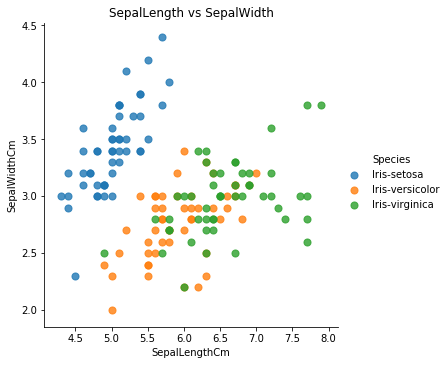

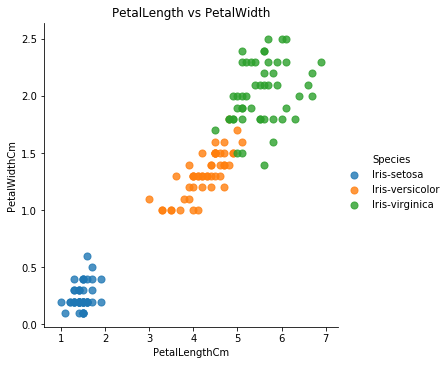

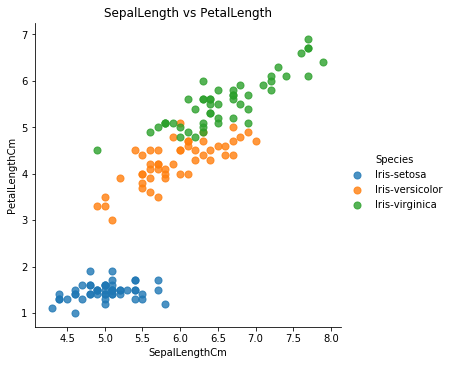

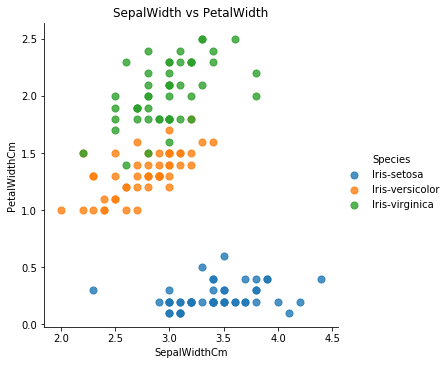

In [21]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [22]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [23]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
47    48            4.6           3.2            1.4           0.2        0
125  126            7.2           3.2            6.0           1.8        2
114  115            5.8           2.8            5.1           2.4        2
102  103            7.1           3.0            5.9           2.1        2
13    14            4.3           3.0            1.1           0.1        0


In [24]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values
X_normalized=normalize(X,axis=0)

#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)

In [25]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 2s 17ms/step - loss: 1.0862 - acc: 0.3250 - val_loss: 1.0583 - val_acc: 0.3333
Epoch 2/10
120/120 [==============================] - 0s 1ms/step - loss: 1.0256 - acc: 0.5917 - val_loss: 0.9737 - val_acc: 0.7333
Epoch 3/10
120/120 [==============================] - 0s 1ms/step - loss: 0.9232 - acc: 0.6500 - val_loss: 0.8184 - val_acc: 0.7333
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: 0.7656 - acc: 0.6500 - val_loss: 0.6218 - val_acc: 0.7333
Epoch 5/10
120/120 [==============================] - 0s 1ms/step - loss: 0.5772 - acc: 0.7750 - val_loss: 0.4495 - val_acc: 0.9667
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4393 - acc: 0.9000 - val_loss: 0.3073 - val_acc: 1.0000
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: 0.3360 - acc: 0.9000 - val_loss: 0.2635 - val_acc: 0.9333
Epoch 8/10
120/120 [==========

In [27]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 100.0


# Redes Neurais Convolucionais

In [ ]:
from keras.datasets import cifar10
from keras import applications
from keras.models import Model
from keras.layers import Input
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop, SGD

import os

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

     8192/170498071 [..............................] - ETA: 4:29

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 500
batch_size = 64
x_shape = [32,32,3]
#get validation data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:

# This will load the whole VGG16 network, including the top Dense layers.
# Note: by specifying the shape of top layers, input tensor shape is forced
# to be (224, 224, 3), therefore you can use it only on 224x224 images.
vgg_model_head = applications.VGG16(weights='imagenet', include_top=True)

# If you are only interested in convolution filters. Note that by not
# specifying the shape of top layers, the input tensor shape is (None, None, 3),
# so you can use them for any size of images.
vgg_model_neck = applications.VGG16(weights='imagenet', include_top=False)

# If you want to specify input tensor
#from keras.layers import Input
input_tensor = Input(shape=x_shape)
vgg_model_input = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)

In [ ]:
# To see the models' architecture and layer names, run the following
vgg_model_head.summary()

In [ ]:
# To see the models' architecture and layer names, run the following
vgg_model_neck.summary()

In [ ]:
# To see the models' architecture and layer names, run the following
vgg_model_input.summary()

In [ ]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model_input.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
custom_model = Model(input=vgg_model_input.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False

# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])

print("HERE")

In [ ]:
def normalize(X_train,X_test):
    #this function normalize inputs for zero mean and unit variance
    # it is used when training a model.
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

In [ ]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train, x_test = normalize(x_train, x_test)
num_classes = 10
batch_size = 128
maxepoches = 250
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

#optimization details
sgd = SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


# training process in a for loop with learning rate drop every 25 epoches.

historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(y_test, x_test),callbacks=[reduce_lr],verbose=2)
model.save_weights('cifar10vgg.h5')